In [1]:
import matplotlib.pyplot as plt
%matplotlib nbagg
import pandas as pd
from glob import glob
import numpy as np
import seaborn as sns
import os

sns.set_style('whitegrid')

In [2]:
def load_results(path):
    
    files = sorted(glob(os.path.join(path, 'fold*_test.csv')))
    
    results = pd.concat([pd.read_csv(fn, index_col=0) for fn in files])
    results = results[['root', 'thirds', 'triads', 'sevenths', 'tetrads', 'majmin', 'mirex']]
    return results

weighted = load_results('/home/bmcfee/working/chords/model_weighted/')

aug_weighted = load_results('/home/bmcfee/working/chords/model_aug_weighted/')

struct_weighted = load_results('/home/bmcfee/working/chords/model_struct_weighted/')

struct_aug_weighted = load_results('/home/bmcfee/working/chords/model_struct_aug_weighted/')

struct_aug_weighted_static = load_results('/home/bmcfee/working/chords/model_struct_aug_weighted_static/')

In [3]:
chordino = load_results('/home/bmcfee/git/chord_models/data/chordino/')

In [4]:
dnn = load_results('/home/bmcfee/git/chord_models/data/ejh2015_dnn/')

In [5]:
khmm = load_results('/home/bmcfee/git/chord_models/data/ejh2015_khmm/')

In [6]:
plain = load_results('/home/bmcfee/working/chords/model/')

In [7]:
aug = load_results('/home/bmcfee/working/chords/model_aug/')

In [8]:
struct = load_results('/home/bmcfee/working/chords/model_struct/')

In [9]:
struct_aug = load_results('/home/bmcfee/working/chords/model_struct_aug/')

In [10]:
deep = load_results('/home/bmcfee/working/chords/model_deep/')

In [11]:
deep_aug = load_results('/home/bmcfee/working/chords/model_deep_aug/')

In [12]:
deep_struct = load_results('/home/bmcfee/working/chords/model_deep_struct/')

In [13]:
deep_struct_aug = load_results('/home/bmcfee/working/chords/model_deep_struct_aug/')

In [14]:
results = pd.Panel({'Chordino': chordino,
                    'DNN': dnn,
                    'KHMM': khmm,
                    'CR1': plain, 
                    'CR1+A': aug, 
                    'CR1+S': struct, 
                    'CR1+S+A': struct_aug,
                    'CR2': deep,
                    'CR2+A': deep_aug,
                    'CR2+S': deep_struct,
                    'CR2+S+A': deep_struct_aug,
                   })

In [15]:
results = results[['CR2+S+A', 'CR2+S', 'CR2+A', 'CR2',
                   'CR1+S+A', 'CR1+S', 'CR1+A', 'CR1',
                   'KHMM', 'DNN']]#, 'Chordino']]

In [67]:
plt.close('all')

In [68]:
SAVE = True

<IPython.core.display.Javascript object>


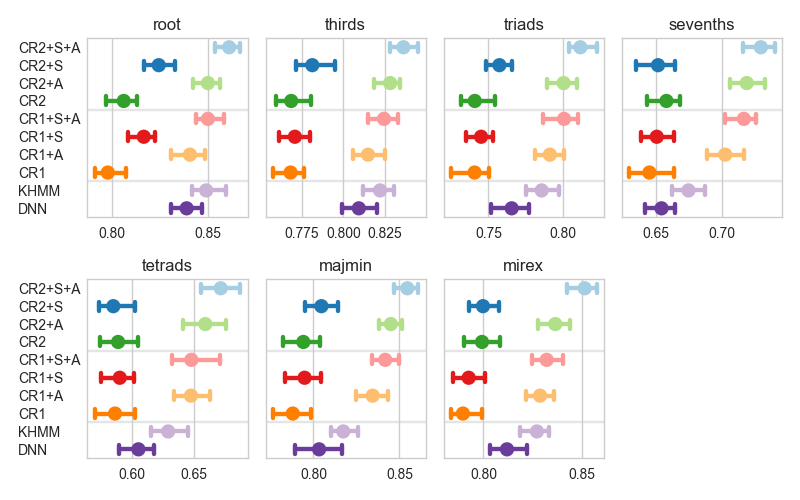

In [69]:
P = sns.pointplot

plt.figure(figsize=(8, 5))

for i, tab in enumerate(results.minor_axis, 1):
    ax = plt.subplot(2,4,i)
    P(data=results[:,:,tab], orient='h', join=False, palette='Paired', capsize=0.5, estimator=np.median)
    plt.axhline(7.5, alpha=0.1, zorder=-1, color='k')
    plt.axhline(3.5, alpha=0.1, zorder=-1, color='k')
    plt.title(tab)
    
    
    if i % 4 != 1:
        plt.yticks([])
    else:
        
        labs = ax.yaxis.get_ticklabels()
        ax.yaxis.set_ticklabels(labs, ha='left')
        ax.yaxis.set_tick_params(pad=50)
    
plt.tight_layout()

if SAVE:
    plt.savefig('/home/bmcfee/git/chord_models/paper/figs/crnn-scores.pdf', transparent=True, pad_inches=0)
    !convert /home/bmcfee/git/chord_models/paper/figs/crnn-scores.pdf /home/bmcfee/git/chord_models/paper/figs/crnn-scores.eps

In [76]:
results.minor_xs('mirex').describe()


,CR2+S+A,CR2+S,CR2+A,CR2,CR1+S+A,CR1+S,CR1+A,CR1,KHMM,DNN
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000
mean,0.811272,0.767938,0.801729,0.764142,0.797898,0.759125,0.793127,0.756643,0.786817,0.776130
std,0.146077,0.152095,0.148067,0.156029,0.149383,0.153451,0.143750,0.155151,0.157475,0.161614
min,0.014316,0.015409,0.006156,0.016791,0.005643,0.015428,0.004487,0.023617,0.000000,0.010210
25%,0.763631,0.709140,0.757538,0.707967,0.748100,0.698859,0.737994,0.702486,0.730905,0.707672
50%,0.851603,0.799749,0.836592,0.799251,0.832222,0.792450,0.828840,0.789525,0.827247,0.811983
75%,0.906792,0.872031,0.901998,0.872464,0.898466,0.866002,0.890504,0.861204,0.888923,0.892997
max,0.999719,1.000000,1.000000,1.000000,0.993823,0.992889,0.994758,1.000000,0.986186,1.000000


In [16]:
khmm.describe().loc['50%']

root        0.849054
thirds      0.822075
triads      0.785848
sevenths    0.674446
tetrads     0.629209
majmin      0.817318
mirex       0.827247
Name: 50%, dtype: float64

In [17]:
dnn.describe().loc['50%']

root        0.838913
thirds      0.809332
triads      0.765646
sevenths    0.653990
tetrads     0.605367
majmin      0.803273
mirex       0.811983
Name: 50%, dtype: float64

In [18]:
deep_struct_aug.describe().loc['50%']

root        0.860941
thirds      0.836109
triads      0.811958
sevenths    0.729343
tetrads     0.671271
majmin      0.854630
mirex       0.851603
Name: 50%, dtype: float64

In [19]:
deep_aug.describe().loc['50%']

root        0.849944
thirds      0.828143
triads      0.800649
sevenths    0.718650
tetrads     0.658919
majmin      0.845042
mirex       0.836592
Name: 50%, dtype: float64

In [20]:
struct_aug.describe().loc['50%']

root        0.849938
thirds      0.824422
triads      0.800974
sevenths    0.716466
tetrads     0.647752
majmin      0.841767
mirex       0.832222
Name: 50%, dtype: float64

In [21]:
aug.describe().loc['50%']

root        0.840637
thirds      0.814848
triads      0.791407
sevenths    0.702275
tetrads     0.647465
majmin      0.834425
mirex       0.828840
Name: 50%, dtype: float64

In [52]:
deep_struct_aug.describe() - khmm.describe()

,root,thirds,triads,sevenths,tetrads,majmin,mirex
count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean,0.015337,0.011622,0.021800,0.038462,0.027713,0.031848,0.024455
std,-0.012748,0.001485,0.001496,0.006709,0.008571,-0.002285,-0.011398
min,0.018339,0.014185,0.004446,0.005617,0.004446,0.005617,0.014316
25%,0.013118,0.006726,0.021296,0.033289,0.011143,0.041767,0.032726
50%,0.011887,0.014034,0.026110,0.054898,0.042062,0.037312,0.024356
75%,0.014583,0.014636,0.018573,0.047798,0.036344,0.026831,0.017869
max,0.010357,0.002921,0.003100,0.015612,0.016182,0.013732,0.013533


In [53]:
deep_struct_aug.describe() - deep_aug.describe()

,root,thirds,triads,sevenths,tetrads,majmin,mirex
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,0.014428,0.011513,0.013142,0.012068,0.013021,0.011989,0.013595
std,-0.002597,0.001147,0.000929,-0.002491,0.000020,-0.001887,-0.000998
min,-0.011730,-0.013284,0.002155,-0.018390,0.002155,-0.023680,-0.025338
25%,0.016073,0.005019,0.010548,0.018372,0.017243,0.013886,0.012671
50%,0.015217,0.014324,0.018233,0.016363,0.022923,0.012060,0.022099
75%,0.013219,0.012053,0.010730,0.007637,0.016192,0.010163,0.008937
max,0.001557,-0.004537,-0.004537,-0.000281,0.015286,-0.000281,-0.000281


In [37]:
deep.describe()

,root,thirds,triads,sevenths,tetrads,majmin,mirex
count,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000
mean,0.771648,0.731681,0.694226,0.613750,0.558256,0.750365,0.762534
std,0.152369,0.173254,0.200127,0.210329,0.220754,0.174797,0.156078
min,0.010210,0.010210,0.004788,0.010210,0.004788,0.010210,0.016791
25%,0.713073,0.662141,0.609328,0.490865,0.411885,0.694819,0.709738
50%,0.805122,0.766266,0.739294,0.653658,0.587146,0.791413,0.793123
75%,0.875344,0.854673,0.839789,0.767261,0.723505,0.869385,0.870412
max,0.987907,0.987907,0.987907,1.000000,0.957443,1.000000,1.000000


In [38]:
deep_aug.describe()

,root,thirds,triads,sevenths,tetrads,majmin,mirex
count,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000
mean,0.813500,0.781997,0.742188,0.672917,0.614491,0.798205,0.797677
std,0.136909,0.160551,0.193888,0.198476,0.214789,0.163090,0.147075
min,0.030069,0.027469,0.002291,0.024007,0.002291,0.029297,0.039654
25%,0.765508,0.727302,0.672589,0.567568,0.484556,0.754259,0.750960
50%,0.845724,0.821785,0.793725,0.712980,0.648348,0.842570,0.829504
75%,0.906747,0.894222,0.879361,0.820540,0.771489,0.905035,0.897855
max,0.997560,0.993823,0.993823,1.000000,0.969180,1.000000,1.000000


In [39]:
deep_struct.describe()

,root,thirds,triads,sevenths,tetrads,majmin,mirex
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000
mean,0.789934,0.746873,0.708802,0.616241,0.562551,0.763326,0.767938
std,0.143142,0.165097,0.195589,0.202940,0.215224,0.165785,0.152095
min,0.010210,0.008559,0.001792,0.008559,0.001792,0.008559,0.015409
25%,0.731736,0.672485,0.623253,0.494140,0.419216,0.701209,0.709140
50%,0.824455,0.781417,0.757371,0.651341,0.585259,0.804615,0.799749
75%,0.888347,0.863515,0.846317,0.770863,0.730719,0.874242,0.872031
max,0.981591,0.981591,0.981591,1.000000,0.963241,1.000000,1.000000


In [40]:
deep_struct_aug.describe()

,root,thirds,triads,sevenths,tetrads,majmin,mirex
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000
mean,0.827928,0.793510,0.755330,0.684984,0.627512,0.810194,0.811272
std,0.134312,0.161698,0.194817,0.195986,0.214809,0.161204,0.146077
min,0.018339,0.014185,0.004446,0.005617,0.004446,0.005617,0.014316
25%,0.781581,0.732322,0.683137,0.585940,0.501799,0.768144,0.763631
50%,0.860941,0.836109,0.811958,0.729343,0.671271,0.854630,0.851603
75%,0.919966,0.906275,0.890092,0.828177,0.787681,0.915197,0.906792
max,0.999117,0.989286,0.989286,0.999719,0.984466,0.999719,0.999719


In [993]:
plt.close('all')

---
# Find interesting tracks to poke at

<IPython.core.display.Javascript object>


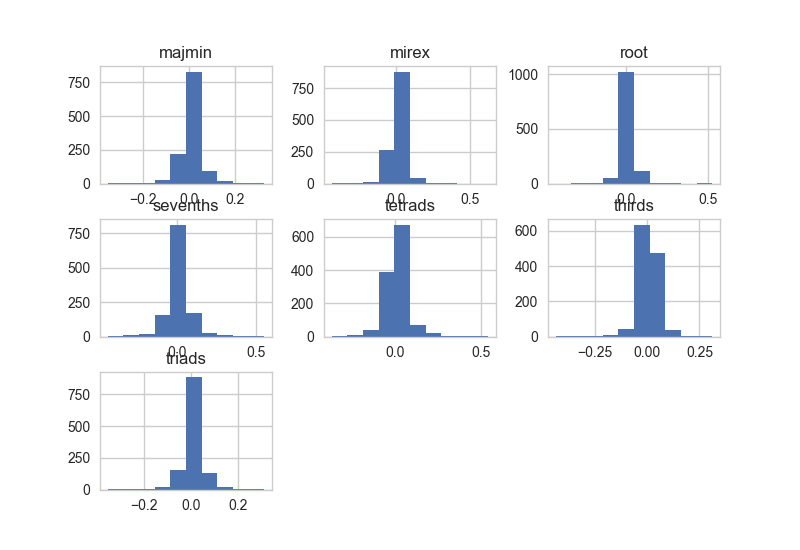

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8dc85c8eb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8dca649cf8>]], dtype=object)

In [81]:
(deep_struct_aug - deep_aug).hist()

In [82]:
# KHMM has biggest gain over CR2SA
(deep_struct_aug['tetrads'] - deep_aug['tetrads']).argmax()

'TRSYHZF149E34F882D'

In [83]:
(deep_struct_aug['tetrads'] - struct_aug['tetrads']).argmax()

'TREIIMT149E3789BE9'

In [85]:
(deep_struct_aug - deep_aug).describe()

,root,thirds,triads,sevenths,tetrads,majmin,mirex
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000
mean,0.011266,0.007167,0.008396,0.007809,0.007572,0.008613,0.009543
std,0.050754,0.051505,0.047689,0.080779,0.071718,0.053794,0.059484
min,-0.428865,-0.438530,-0.354302,-0.437859,-0.370174,-0.354302,-0.428937
25%,-0.006245,-0.008585,-0.007513,-0.023478,-0.018513,-0.008790,-0.008520
50%,0.007656,0.006588,0.006995,0.005808,0.005209,0.006238,0.007116
75%,0.026167,0.027915,0.027478,0.037326,0.033309,0.026633,0.026687
max,0.528204,0.310866,0.310866,0.552941,0.542635,0.326965,0.619098


In [84]:
(deep_struct_aug - struct_aug).describe()

,root,thirds,triads,sevenths,tetrads,majmin,mirex
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000
mean,0.010736,0.012409,0.011127,0.012516,0.011679,0.012177,0.013374
std,0.056082,0.060030,0.057527,0.096141,0.084824,0.066713,0.065160
min,-0.329184,-0.322205,-0.322205,-0.582797,-0.414274,-0.322205,-0.330076
25%,-0.005765,-0.007438,-0.007222,-0.018963,-0.017163,-0.007169,-0.006291
50%,0.007882,0.008974,0.008954,0.007520,0.007501,0.008674,0.008838
75%,0.026357,0.028758,0.027809,0.043291,0.039829,0.028862,0.029092
max,0.611828,0.634080,0.634080,0.925569,0.634080,0.925569,0.893088
